In [132]:
import numpy as np
import pandas as pd
import dimarray as da
import shutil
import os
from matplotlib import pylab as plt
path_greenland = '/home/beckmann/mnt/cluhome/exp_pism/my_first_runs/input_data/'
account='pism'
nu = 2.4e20
sec_to_year = 1/(3600*24*365)/1000 # into ka
sec_to_year_360 = 1/(3600*24*360)/1000 # into ka
sec_to_year_greg = 1/(3600*24*365.2425)/1000 # into ka


import seaborn as sns

sns.set_context('paper')
sns.set_style("whitegrid", {'axes.grid' : False,'font.family':'serif', 'font.serif':'Times New Roman'})
tex_fonts = {
    # Use LaTeX to write all text
    "text.usetex": False,
#     "font.family": "Times New Roman",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 14,
    "font.size": 14,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 14,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    'legend.handlelength': 1
}

plt.rcParams.update(tex_fonts)

In [20]:
ptt = '/home/beckmann/mnt/cluhome/exp_pism/dEBM/spin_up/equi_q_0.3_sia_e_3_from_nobed_no_dt_bed_10_precise_no_skip/'


###### All runs are continued from an equlibrum run for another 10 ka not increasing any  Temperature. 
The default settings are:
- partially filled cells
- lapserate correction
- maximum yearly time step
- a monthly climatological mean
- lc bedrock model
- a 365 day calendar

## LC update ==> 0, is there convergence?
 #### NO!

(7.26, 7.38)

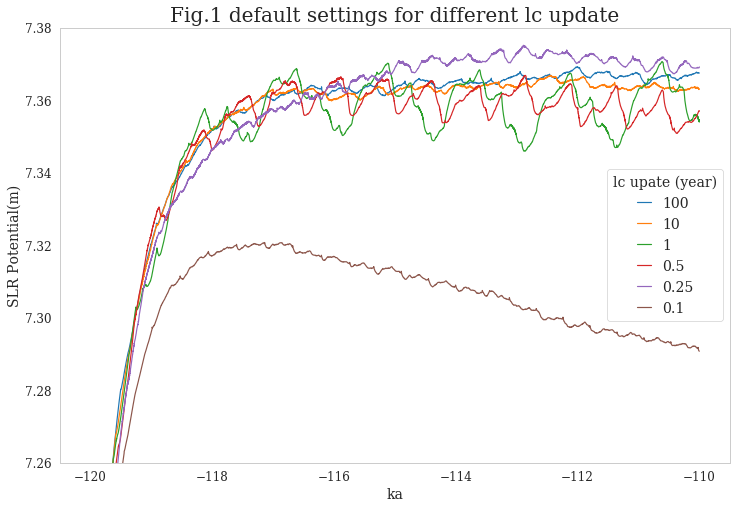

In [77]:
dirs_365 = [
    'equi_q_0.6_sia_e_3_no_dt_bed_100_365d_pdd',
    'equi_q_0.6_sia_e_3_no_dt_bed_10_365d_pdd',
    'equi_q_0.6_sia_e_3_no_dt_bed_1_365d_pdd',
    'equi_q_0.6_sia_e_3_no_dt_bed_0.5_365d_pdd',
    'equi_q_0.6_sia_e_3_no_dt_bed_0.25_365d_pdd',
    'equi_q_0.6_sia_e_3_no_dt_bed_0.1_365d_pdd',
    

]
f, ax = plt.subplots(1,1, figsize = (12,8))
for i, folder in enumerate(dirs_365):
    data = ptt +folder +'/ts_gris_18000m.nc'
#     print(folder)
    d = da.read_nc(data, 'sea_level_rise_potential')
    lb = folder.split('bed_')[-1].split('_')[0]
    ax.plot(d.time * sec_to_year,d.values, label = lb)
ax.legend(title = 'lc upate (year)')
ax.set_title('Fig.1 default settings for different lc update', fontsize = 20)
ax.set_ylabel('SLR Potential(m)')
ax.set_xlabel('ka')
ax.set_ylim([7.26,7.38])

All these experiments are rune with the default settings and with different lc update time intervals for the linge-clark bedrodck model. I can not see any convergence here. We have big amplitude for lc update = 1 and 0.5. For other lc updates lead to smaller amplitudes. I belive that is also due to our moonthly climatological, thickness differences may be bigger between summer and winter than from year to year. Thas why amplitudes are bigger in lc update 1 and 0.5.  For lc update =1 I tried for different settings (lapserate correction off, annual climatological mean) and we allways see and oscilltions with the same frequency but different Amplitude . Intersetly we see a smaller frequency of oscillation when we use a 360 days calendar:

 ## no how does this behave with 360 day calendar

(7.26, 7.38)

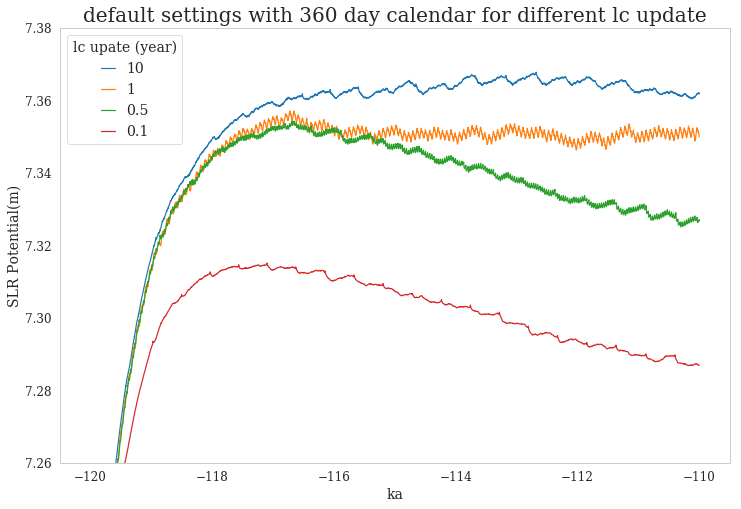

In [78]:
dirs_360 = [
    'equi_q_0.6_sia_e_3_no_dt_bed_10_360d_pdd',
    'equi_q_0.6_sia_e_3_no_dt_bed_1_360d_pdd',
    'equi_q_0.6_sia_e_3_no_dt_bed_0.5_360d_pdd',
    'equi_q_0.6_sia_e_3_no_dt_bed_0.1_360d_pdd',
    

]
f, ax = plt.subplots(1,1, figsize = (12,8))
for i, folder in enumerate(dirs_360):
    data = ptt +folder +'/ts_gris_18000m.nc'
#     print(folder)
    d = da.read_nc(data, 'sea_level_rise_potential')
    lb = folder.split('bed_')[-1].split('_')[0]
    ax.plot(d.time * sec_to_year_360,d.values, label = lb)
ax.legend(title = 'lc upate (year)')
ax.set_title('default settings with 360 day calendar for different lc update', fontsize = 20)
ax.set_ylabel('SLR Potential(m)')
ax.set_xlabel('ka')
ax.set_ylim([7.26,7.38])

# Why do we see these frequencies?
Our Theorie is that allthough we set a certain calendar in the pism command and climatological field (e.g. 360 day) PISM still has other calendars runnning in the bedrock model or other submodels  or it is due ot the UDUNIT system. A year in PISM  will be 365.2421987.. somewhere. This way we generate two waves with different frequencis, these superpostion can lead to a beat. The closer the freuqnecies are togeather the longer the new time period will be. <br>
Thus for a 360 day cleandar we have: <br>
$T_1=360day$ and $T_2=365.2421$<br>
<br>
$f_1= \frac{1}{T_1}$ and $f_2= \frac{1}{T_2}$ <br>
<br>
$f_n = f_1-f_2$<br>
<br> 

$T_n = \frac{1}{T_n}= \frac{1}{f1-f2} = \frac{1}{\frac{1}{T_1}-\frac{1}{T_2}}=\frac{T_1\cdot T2}{T_2-T_1}  $
<br> 
Now get the new time period in unit years of the 360d calendar: <br> 
$T_n[360d] = \frac{T_n}{T_1} = \frac{365.2421}{365.2421-360} = 69.67$
<br>  For the **360** day calendar this gives us a frequnecy of approximatly **70 years**.<br> 
For the **365 day** calenadar $T_1 = 365$ and this gives us longer frequencies of about **1500 years**. 


Text(0.5, 1.0, '365day calendar ')

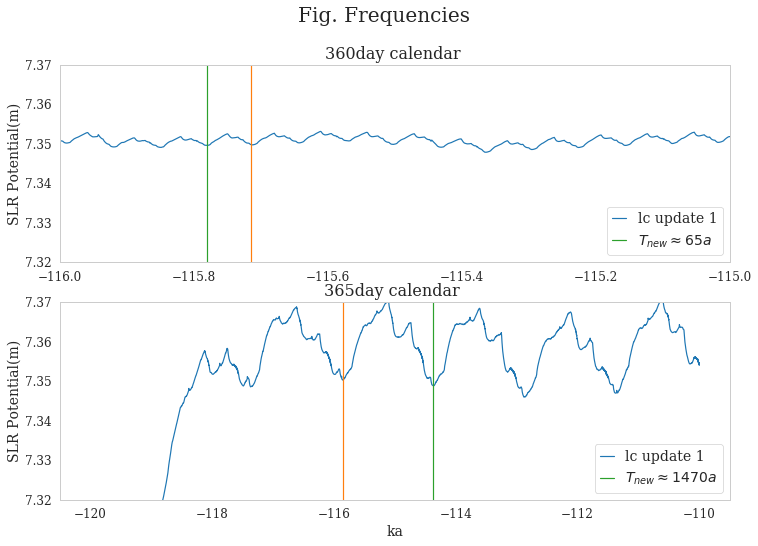

In [107]:
dirs_360 = [

    'equi_q_0.6_sia_e_3_no_dt_bed_1_360d_pdd'
]
dirs_365=[
    'equi_q_0.6_sia_e_3_no_dt_bed_1_365d_pdd'
    ]
f, ax = plt.subplots(2,1, figsize = (12,8))
for i, folder in enumerate(dirs_360):
    data = ptt +folder +'/ts_gris_18000m.nc'
#     print(folder)
    d = da.read_nc(data, 'sea_level_rise_potential')
    lb = folder.split('bed_')[-1].split('_')[0]
    ax[0].plot(d.time * sec_to_year_360,d.values, label = 'lc update '+lb)
ax[0].plot([-115.715,-115.715 ],[7.3,7.4])
ax[0].plot([-115.78,-115.78],[7.3,7.4],label ='$T_{new}  \\approx 65 a$')

ax[0].legend(loc =4)
ax[0].set_ylabel('SLR Potential(m)')
# ax[0].set_xlabel('ka')
ax[0].set_ylim([7.32,7.37])
ax[0].set_xlim([-116,-115])


for i, folder in enumerate(dirs_365):
    data = ptt +folder +'/ts_gris_18000m.nc'
#     print(folder)
    d = da.read_nc(data, 'sea_level_rise_potential')
    lb = folder.split('bed_')[-1].split('_')[0]
    ax[1].plot(d.time * sec_to_year,d.values, label = 'lc update '+lb)
ax[1].plot([-115.85,-115.85 ],[7.3,7.4])
ax[1].plot([-114.38,-114.38],[7.3,7.4],label ='$T_{new}  \\approx 1470 a$')


ax[1].legend(loc = 4)
ax[1].set_ylabel('SLR Potential(m)')
ax[1].set_xlabel('ka')
ax[1].set_ylim([7.32,7.37])
# ax[1].set_xlim([-116,-115])
f.suptitle('Fig. Frequencies', fontsize = 20)
ax[0].set_title('360day calendar ', fontsize = 16)
ax[1].set_title('365day calendar ',fontsize = 16)

# Proof 
Here we  hardcoded the Bedrock model to calulate its calendar to 360 day when using a 360 day calendar and 365 day calendar when using a 365 day calendar. As you can see the small frequencies of 65 year in the 360day calendar vanish and also the frequencies of the 365days are reduced. However, we can still see some frequencies and we think that is due to the udunit system or other calendars still running in other submodules  of PISM. 

Text(0.5, 0, 'ka')

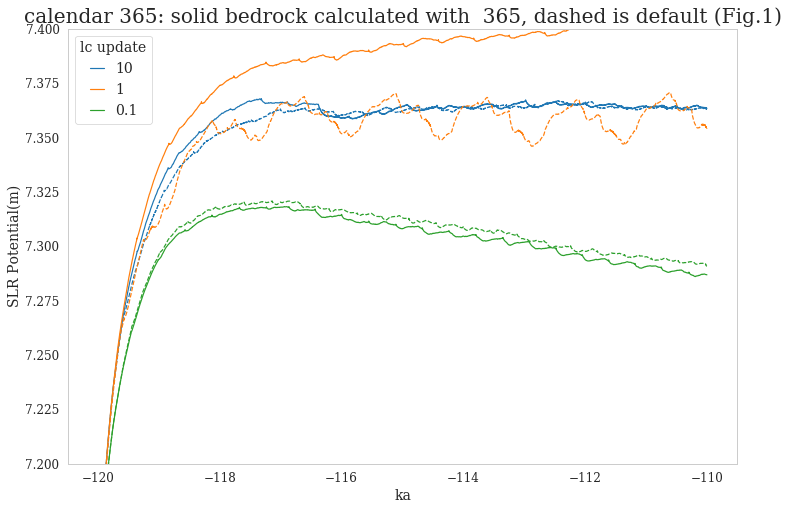

In [113]:
dirs = [
    'equi_q_0.6_sia_e_3_no_dt_bed_10_lcu365_365d_pdd',
    'equi_q_0.6_sia_e_3_no_dt_bed_1_lcu365_365d_pdd',
#     'equi_q_0.6_sia_e_3_no_dt_bed_0.5_lcu365_365d_pdd',
    'equi_q_0.6_sia_e_3_no_dt_bed_0.1_lcu365_365d_pdd',
    
    
#     

]
f, ax = plt.subplots(1,1, figsize = (12,8))
for i, folder in enumerate(dirs):
    data = ptt +folder +'/ts_gris_18000m.nc'
#     print(folder)
    d = da.read_nc(data, 'sea_level_rise_potential')
    lb = folder.split('bed_')[-1].split('_')[0]
    l1 =ax.plot(d.time * sec_to_year,d.values, label = lb)
    l2,l4 =folder.split('_lcu365')
    folder2 =l2 +l4
    data2 = ptt +folder2 +'/ts_gris_18000m.nc'
    d2 = da.read_nc(data2, 'sea_level_rise_potential')
    
    ax.plot(d2.time * sec_to_year,d2.values,color = l1[0].get_color(), linestyle = 'dashed' )
    
ax.legend(title = 'lc update')
ax.set_title('calendar 365: solid bedrock calculated with  365, dashed is default (Fig.1)',fontsize = 20)
ax.set_ylim([7.2,7.4])
ax.set_ylabel('SLR Potential(m)')
ax.set_xlabel('ka')

(7.2, 7.4)

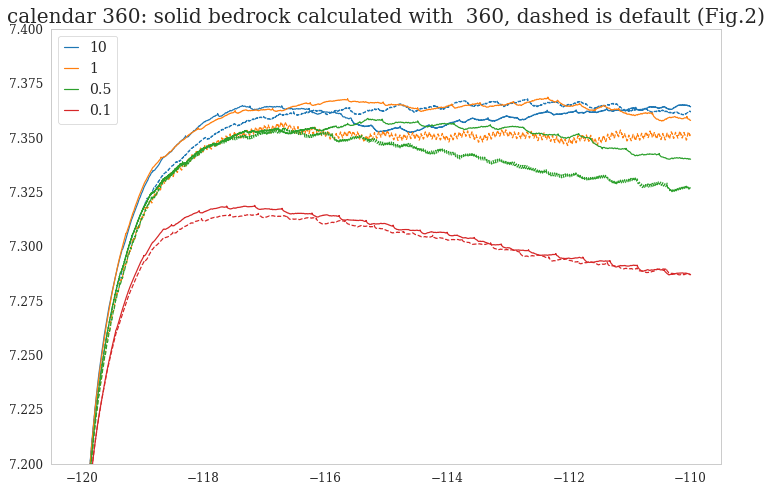

In [161]:
dirs = [
    'equi_q_0.6_sia_e_3_no_dt_bed_10_360d_pdd_bed360',
    'equi_q_0.6_sia_e_3_no_dt_bed_1_360d_pdd_bed360',
    'equi_q_0.6_sia_e_3_no_dt_bed_0.5_360d_pdd_bed360',
    'equi_q_0.6_sia_e_3_no_dt_bed_0.1_360d_pdd_bed360',
    
#     'equi_q_0.6_sia_e_3_no_dt_bed_1_lcu365_365d_pdd',
# #     'equi_q_0.6_sia_e_3_no_dt_bed_0.5_lcu365_365d_pdd',
#     'equi_q_0.6_sia_e_3_no_dt_bed_0.1_lcu365_365d_pdd',
    
    
#     

]
f, ax = plt.subplots(1,1, figsize = (12,8))
for i, folder in enumerate(dirs):
    data = ptt +folder +'/ts_gris_18000m.nc'
#     print(folder)
    d = da.read_nc(data, 'sea_level_rise_potential')
    lb = folder.split('bed_')[-1].split('_')[0]
    l1 =ax.plot(d.time * sec_to_year_360,d.values, label = lb)
    l2,l4 =folder.split('_bed360')
    folder2 =l2
    data2 = ptt +folder2 +'/ts_gris_18000m.nc'
    d2 = da.read_nc(data2, 'sea_level_rise_potential')
    
    ax.plot(d2.time * sec_to_year_360,d2.values,color = l1[0].get_color(), linestyle = 'dashed' )
    
ax.legend()
ax.set_title('calendar 360: solid bedrock calculated with  360, dashed is default (Fig.2)',fontsize = 20)

ax.set_ylim([7.2,7.4])


##### a monthly timestep reduces the spred in slr for different lc update, however frequencies still remain.

equi_q_0.6_sia_e_3_no_dt_bed_10_360d_pdd_bed360
equi_q_0.6_sia_e_3_no_dt_bed_1_360d_pdd_bed360
equi_q_0.6_sia_e_3_no_dt_bed_0.1_360d_pdd_bed360


(7.2, 7.4)

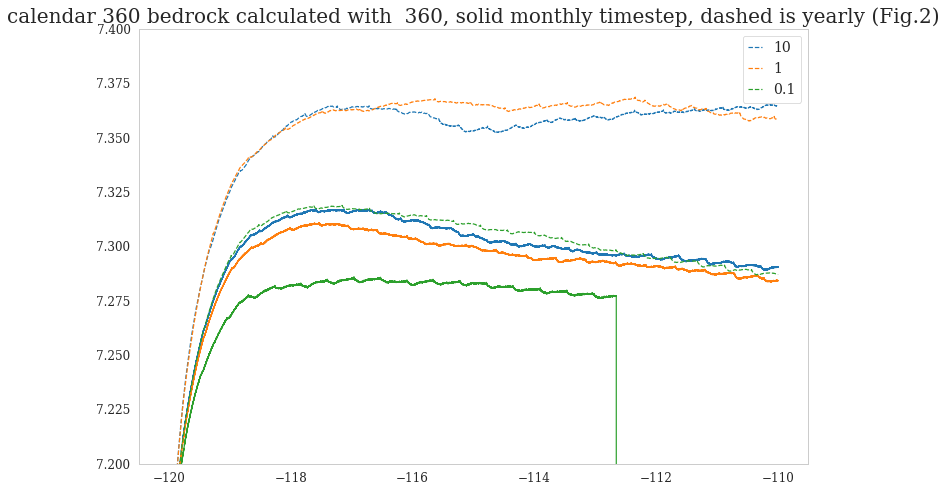

In [162]:
dirs = [
    'equi_q_0.6_sia_e_3_no_dt_bed_10_360d_pdd_bed360',
    'equi_q_0.6_sia_e_3_no_dt_bed_1_360d_pdd_bed360',
#     'equi_q_0.6_sia_e_3_no_dt_bed_0.5_360d_pdd_bed360',
    'equi_q_0.6_sia_e_3_no_dt_bed_0.1_360d_pdd_bed360',
    
#     'equi_q_0.6_sia_e_3_no_dt_bed_1_lcu365_365d_pdd',
# #     'equi_q_0.6_sia_e_3_no_dt_bed_0.5_lcu365_365d_pdd',
#     'equi_q_0.6_sia_e_3_no_dt_bed_0.1_lcu365_365d_pdd',
    
    
#     

]
f, ax = plt.subplots(1,1, figsize = (12,8))
for i, folder in enumerate(dirs):
    data = ptt +folder +'/ts_gris_18000m.nc'
    print(folder)
    d = da.read_nc(data, 'sea_level_rise_potential')
    lb = folder.split('bed_')[-1].split('_')[0]
    l1 =ax.plot(d.time * sec_to_year_360,d.values, label = lb, linestyle = 'dashed')
    
    folder2 =folder +'_tmonthly'
    data2 = ptt +folder2 +'/ts_gris_18000m.nc'
    d2 = da.read_nc(data2, 'sea_level_rise_potential')
    
    ax.plot(d2.time * sec_to_year_360,d2.values,color = l1[0].get_color(), linestyle = 'solid' )
    
ax.legend()
ax.set_title('calendar 360 bedrock calculated with  360, solid monthly timestep, dashed is yearly (Fig.2)',fontsize = 20)

ax.set_ylim([7.2,7.4])

equi_q_0.6_sia_e_3_no_dt_bed_10_360d_pdd_bed360
equi_q_0.6_sia_e_3_no_dt_bed_1_360d_pdd_bed360
equi_q_0.6_sia_e_3_no_dt_bed_0.1_360d_pdd_bed360


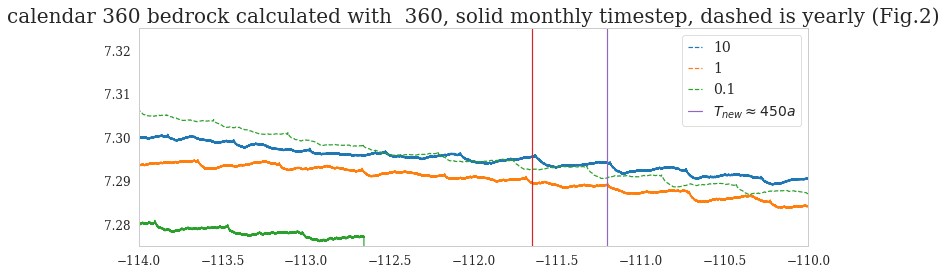

In [179]:
dirs = [
    'equi_q_0.6_sia_e_3_no_dt_bed_10_360d_pdd_bed360',
    'equi_q_0.6_sia_e_3_no_dt_bed_1_360d_pdd_bed360',
#     'equi_q_0.6_sia_e_3_no_dt_bed_0.5_360d_pdd_bed360',
    'equi_q_0.6_sia_e_3_no_dt_bed_0.1_360d_pdd_bed360',
    
#     'equi_q_0.6_sia_e_3_no_dt_bed_1_lcu365_365d_pdd',
# #     'equi_q_0.6_sia_e_3_no_dt_bed_0.5_lcu365_365d_pdd',
#     'equi_q_0.6_sia_e_3_no_dt_bed_0.1_lcu365_365d_pdd',
    
    
#     

]
f, ax = plt.subplots(1,1, figsize = (12,4))
for i, folder in enumerate(dirs):
    data = ptt +folder +'/ts_gris_18000m.nc'
    print(folder)
    d = da.read_nc(data, 'sea_level_rise_potential')
    lb = folder.split('bed_')[-1].split('_')[0]
    l1 =ax.plot(d.time * sec_to_year_360,d.values, label = lb, linestyle = 'dashed')
    
    folder2 =folder +'_tmonthly'
    data2 = ptt +folder2 +'/ts_gris_18000m.nc'
    d2 = da.read_nc(data2, 'sea_level_rise_potential')
    
    ax.plot(d2.time * sec_to_year_360,d2.values,color = l1[0].get_color(), linestyle = 'solid' )
    
ax.set_title('calendar 360 bedrock calculated with  360, solid monthly timestep, dashed is yearly (Fig.2)',fontsize = 20)

ax.set_ylim([7.275,7.325])
ax.set_xlim([-114,-110])

ax.plot([-111.65,-111.65 ],[7.2,7.4])
ax.plot([-111.2,-111.2],[7.2,7.4],label ='$T_{new}  \\approx 450 a$')
ax.legend()


### Using  a gregorian calendar doesnn't allow me to use -atmosphere_given_period 1. Thus I am using a 365 day calendar but with time bounds of 365.2425 

equi_q_0.6_sia_e_3_no_dt_bed_100_365d_gregorian
equi_q_0.6_sia_e_3_no_dt_bed_10_365d_gregorian
equi_q_0.6_sia_e_3_no_dt_bed_1_365d_gregorian


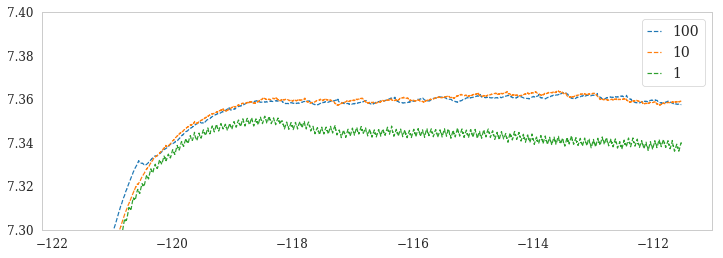

In [191]:
dirs = [
    'equi_q_0.6_sia_e_3_no_dt_bed_100_365d_gregorian',
    'equi_q_0.6_sia_e_3_no_dt_bed_10_365d_gregorian',
    'equi_q_0.6_sia_e_3_no_dt_bed_1_365d_gregorian',
#     'equi_q_0.6_sia_e_3_no_dt_bed_0.25_365d_gregorian',
#     'equi_q_0.6_sia_e_3_no_dt_bed_0.1_365d_gregorian',
    
    
]
f, ax = plt.subplots(1,1, figsize = (12,4))
for i, folder in enumerate(dirs):
    data = ptt +folder +'/ts_gris_18000m.nc'
    print(folder)
    d = da.read_nc(data, 'sea_level_rise_potential')
    lb = folder.split('bed_')[-1].split('_')[0]
    l1 =ax.plot(d.time * sec_to_year_360,d.values, label = lb, linestyle = 'dashed')
    
#     folder2 =folder +'_tmonthly'
#     data2 = ptt +folder2 +'/ts_gris_18000m.nc'
#     d2 = da.read_nc(data2, 'sea_level_rise_potential')
    
#     ax.plot(d2.time * sec_to_year_360,d2.values,color = l1[0].get_color(), linestyle = 'solid' )
    
# ax.set_title('calendar 360 bedrock calculated with  360, solid monthly timestep, dashed is yearly (Fig.2)',fontsize = 20)

ax.set_ylim([7.3,7.4])
# ax.set_xlim([-114,-110])

# ax.plot([-111.65,-111.65 ],[7.2,7.4])
# ax.plot([-111.2,-111.2],[7.2,7.4],label ='$T_{new}  \\approx 450 a$')
ax.legend()
